## RESEARCH QUESTION 2

To what extent past class failures might have an impact on alcohol consumption in students?

# Best Classifiers

## Random Forest
### Train Acc= 0.8251121076233184
### Test Acc= 0.6172248803827751

## Soft Voting
### Test Acc= 0.7017937219730942
### Train Acc= 0.6411483253588517

## KNN(k=8)
### Train Acc= 0.668161
### Test Acc= 0.622010,

## Multinomial NB
### Train Acc= 0.602017937219731
### Test Acc= 0.6172248803827751

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
#set_config(transform_output = "pandas")

In [2]:
#conda install --channel=conda-forge scikit-learn

## Function to Save Figures

In [3]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 2"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')


In [5]:
X_train.columns


Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

## baseline classifier 0 R

In [6]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = X_train.drop(columns = 'alc')
y = X_train['alc']

In [7]:
xt = X_test.drop('avg_grade',axis=1)

In [8]:
dummy.fit(X,y)

DummyClassifier(strategy='most_frequent')

### 0r classifier accuray

In [9]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(X_train['alc'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(X_test['alc'], 
                                      dummy.predict(xt)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


In [10]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
#[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
y_test = X_test['alc']
X_test = X_test[['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]



In [11]:
y_train

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
887    1.0
888    1.0
889    1.0
890    1.0
891    1.0
Name: alc, Length: 892, dtype: float64

In [12]:
X_train.columns


Index(['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures',
       'absences', 'avg_grade'],
      dtype='object')

## Finding suitable value of k for KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

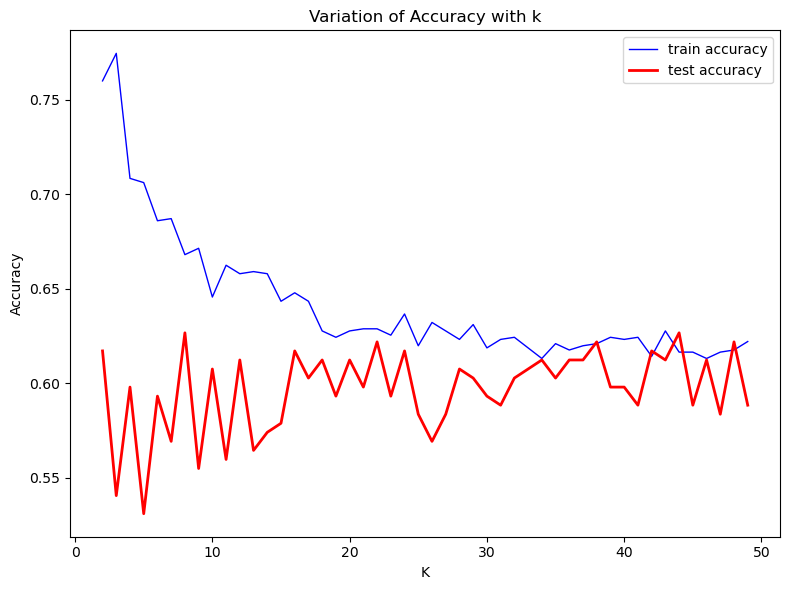

In [16]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [17]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.760090  0.617225
1    3   0.774664  0.540670
2    4   0.708520  0.598086
3    5   0.706278  0.531100
4    6   0.686099  0.593301
5    7   0.687220  0.569378
6    8   0.668161  0.626794
7    9   0.671525  0.555024
8   10   0.645740  0.607656
9   11   0.662556  0.559809
10  12   0.658072  0.612440
11  13   0.659193  0.564593
12  14   0.658072  0.574163
13  15   0.643498  0.578947
14  16   0.647982  0.617225
15  17   0.643498  0.602871
16  18   0.627803  0.612440
17  19   0.624439  0.593301
18  20   0.627803  0.612440
19  21   0.628924  0.598086
20  22   0.628924  0.622010
21  23   0.625561  0.593301
22  24   0.636771  0.617225
23  25   0.619955  0.583732
24  26   0.632287  0.569378
25  27   0.627803  0.583732
26  28   0.623318  0.607656
27  29   0.631166  0.602871
28  30   0.618834  0.593301
29  31   0.623318  0.588517
30  32   0.624439  0.602871
31  33   0.618834  0.607656
32  34   0.613229  0.612440
33  35   0.621076  0.602871
34  36   0.617713  0.612440
35  37   0.619955  0.612440
36  38   0.621076  0.622010
37  39   0.624439  0.598086
38  40   0.623318  0.598086
39  41   0.624439  0.588517
40  42   0.614350  0.617225
41  43   0.627803  0.612440
42  44   0.616592  0.626794
43  45   0.616592  0.588517
44  46   0.613229  0.612440
45  47   0.616592  0.583732
46  48   0.617713  0.622010
47  49   0.622197  0.588517

## Applying suitable value of k in KNN Classifier

In [18]:
best_grid_knn= KNeighborsClassifier(n_neighbors=8)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[348  98]
 [198 248]]
Accuracy Score 0.6681614349775785
Classification report: 
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       446
         1.0       0.72      0.56      0.63       446

    accuracy                           0.67       892
   macro avg       0.68      0.67      0.66       892
weighted avg       0.68      0.67      0.66       892



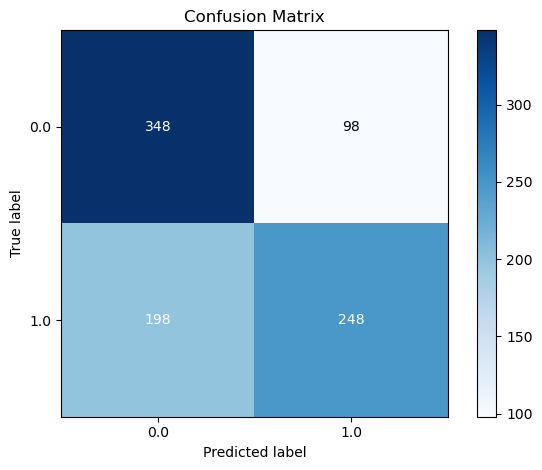

In [19]:
y_pred=best_grid_knn.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for KNN hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[91 36]
 [42 40]]
Accuracy Score 0.6267942583732058
Classification report: 
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       127
         1.0       0.53      0.49      0.51        82

    accuracy                           0.63       209
   macro avg       0.61      0.60      0.60       209
weighted avg       0.62      0.63      0.62       209



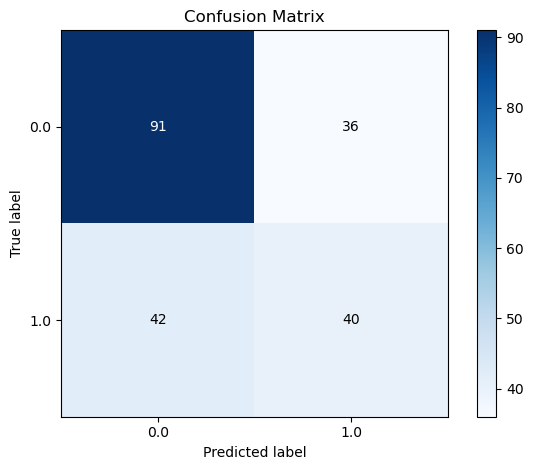

In [20]:
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

In [21]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

0   1
0  91  36
1  42  40

In [22]:
# !pip install scikit-plot


import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.6267942583732058


## Hyperparameter Tuning on Decision Tree

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [46]:
param_grid = {
    'criterion' : ['gini'],
    'splitter' : ['best'],
    'max_depth' : range(2,4),
}

In [47]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 4),
                         'splitter': ['best']},
             verbose=2)

In [48]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=3)

## Appying best estimators on Decision Tree

[[77 50]
 [33 49]]
Accuracy Score 0.6028708133971292
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       127
         1.0       0.49      0.60      0.54        82

    accuracy                           0.60       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.62      0.60      0.61       209



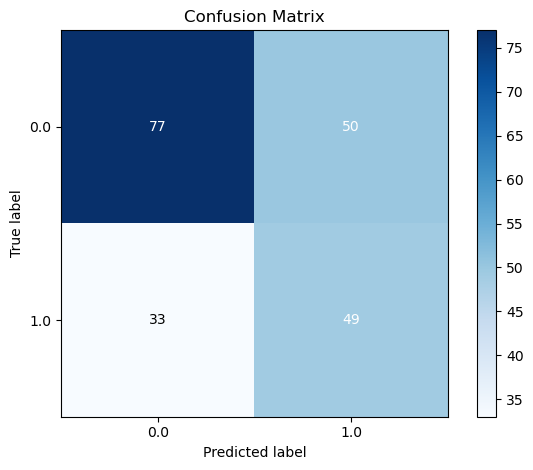

In [49]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

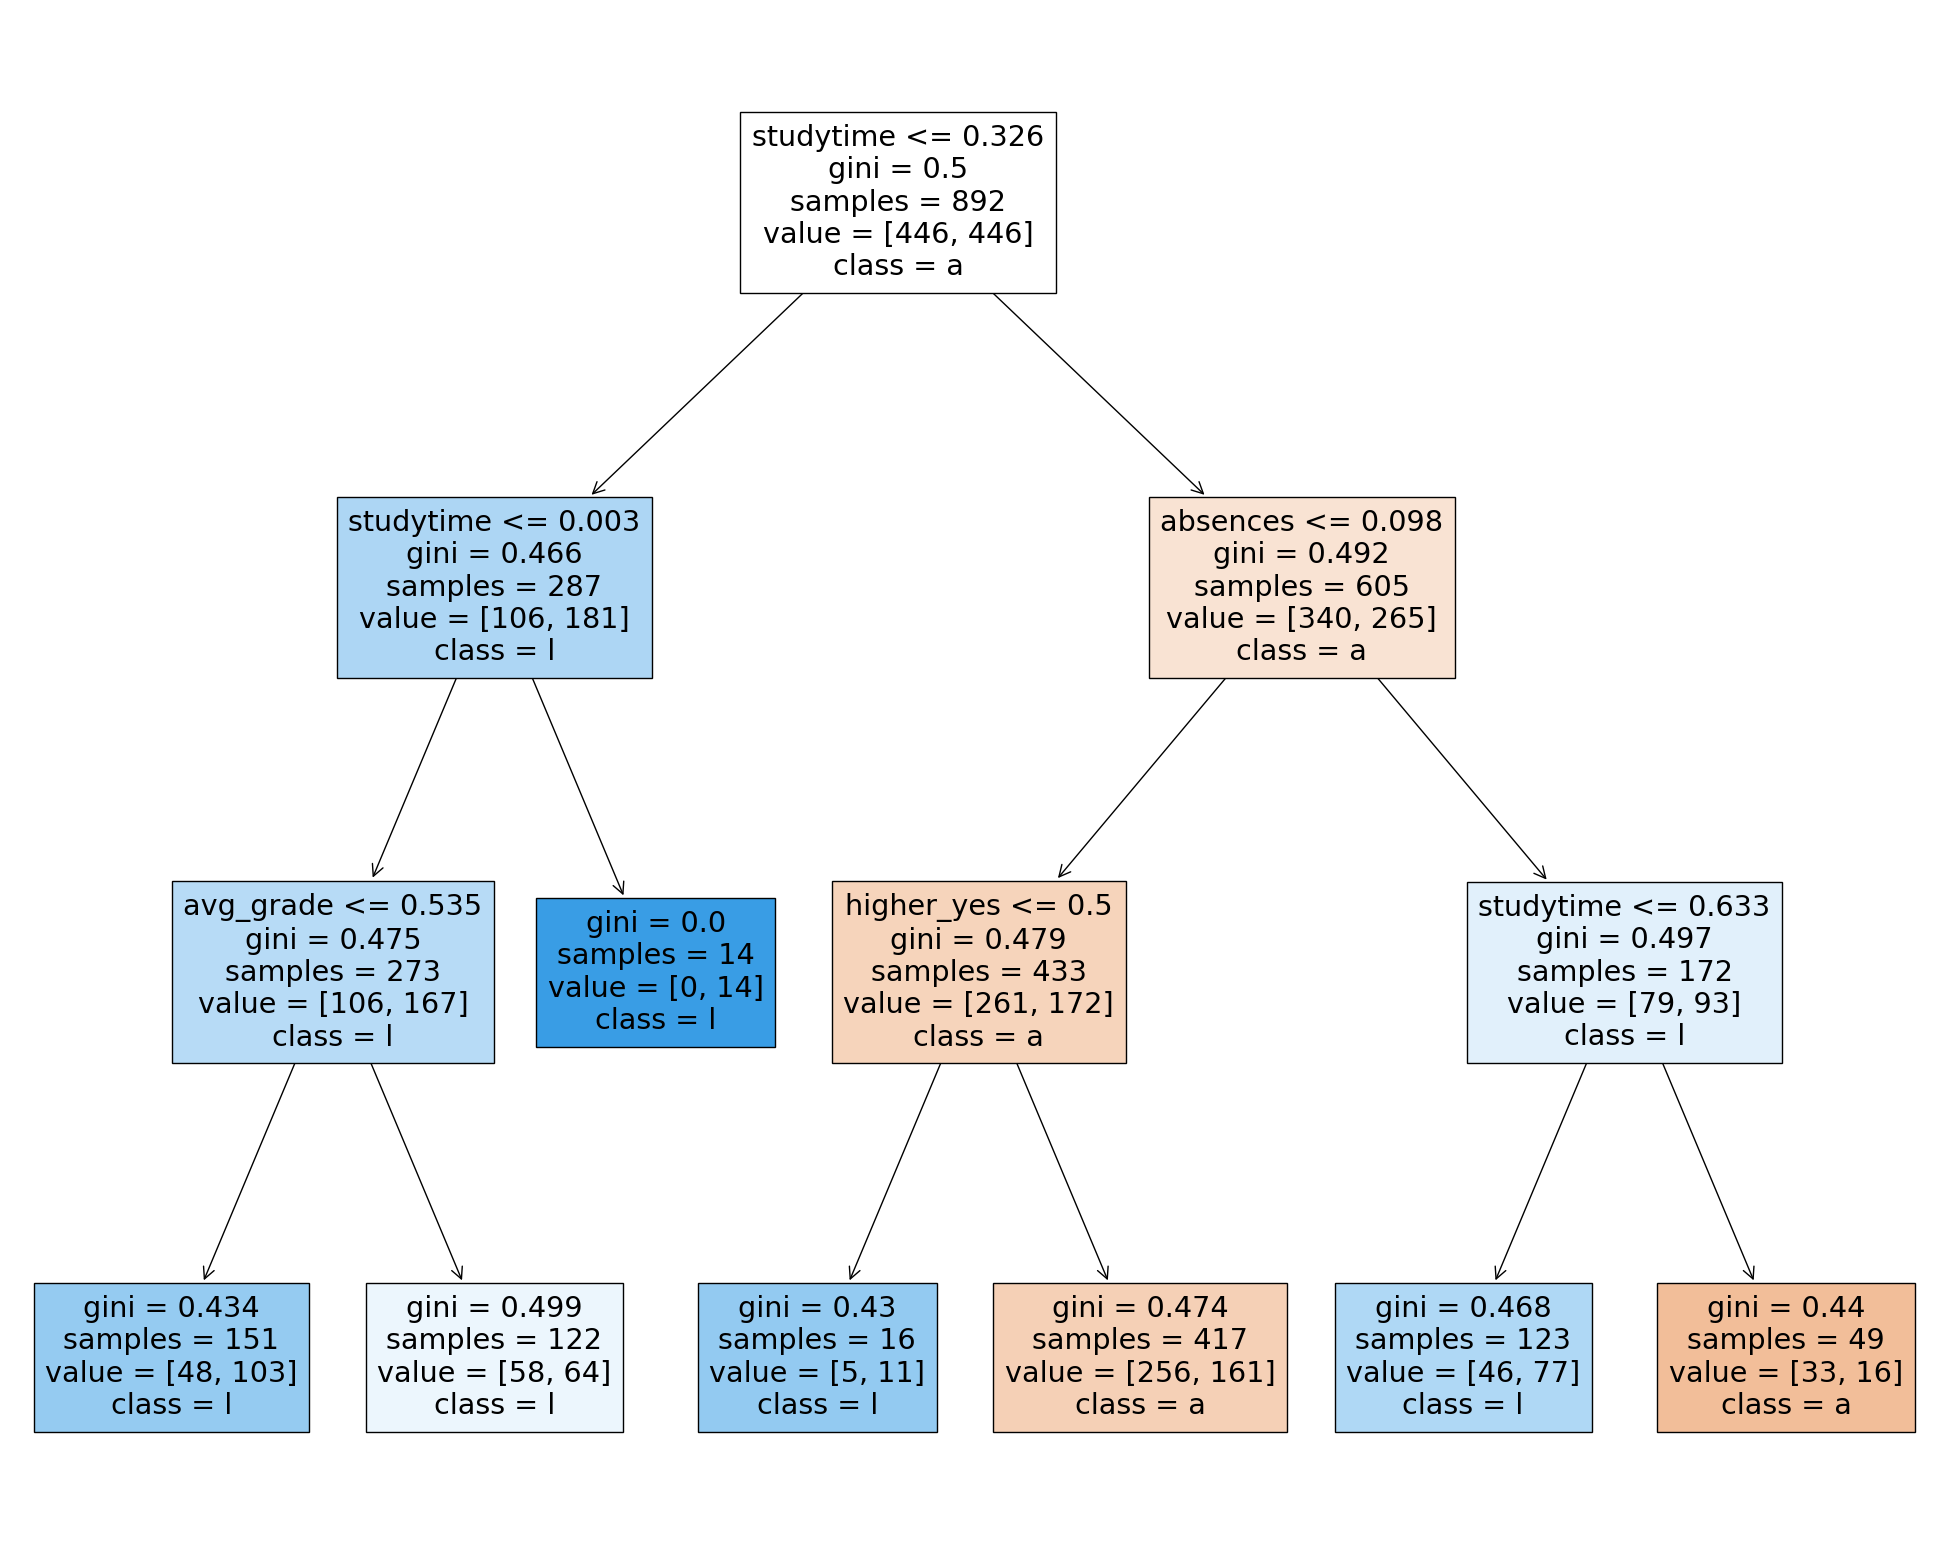

In [50]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [51]:
fig.savefig("decision_tree.png")

Max Depth =  1 , Train Acc. =  0.584 , Test Acc. =  0.608
Max Depth =  2 , Train Acc. =  0.6 , Test Acc. =  0.598
Max Depth =  3 , Train Acc. =  0.626 , Test Acc. =  0.603
Max Depth =  4 , Train Acc. =  0.632 , Test Acc. =  0.612
Max Depth =  5 , Train Acc. =  0.654 , Test Acc. =  0.612
Max Depth =  6 , Train Acc. =  0.683 , Test Acc. =  0.627
Max Depth =  7 , Train Acc. =  0.706 , Test Acc. =  0.608
Max Depth =  8 , Train Acc. =  0.726 , Test Acc. =  0.603
Max Depth =  9 , Train Acc. =  0.749 , Test Acc. =  0.598
Max Depth =  10 , Train Acc. =  0.769 , Test Acc. =  0.593
Max Depth =  11 , Train Acc. =  0.794 , Test Acc. =  0.584
Max Depth =  12 , Train Acc. =  0.816 , Test Acc. =  0.574
Max Depth =  13 , Train Acc. =  0.833 , Test Acc. =  0.584
Max Depth =  14 , Train Acc. =  0.848 , Test Acc. =  0.617
Max Depth =  15 , Train Acc. =  0.859 , Test Acc. =  0.598
Max Depth =  16 , Train Acc. =  0.863 , Test Acc. =  0.617
Max Depth =  17 , Train Acc. =  0.877 , Test Acc. =  0.579
Max Dept

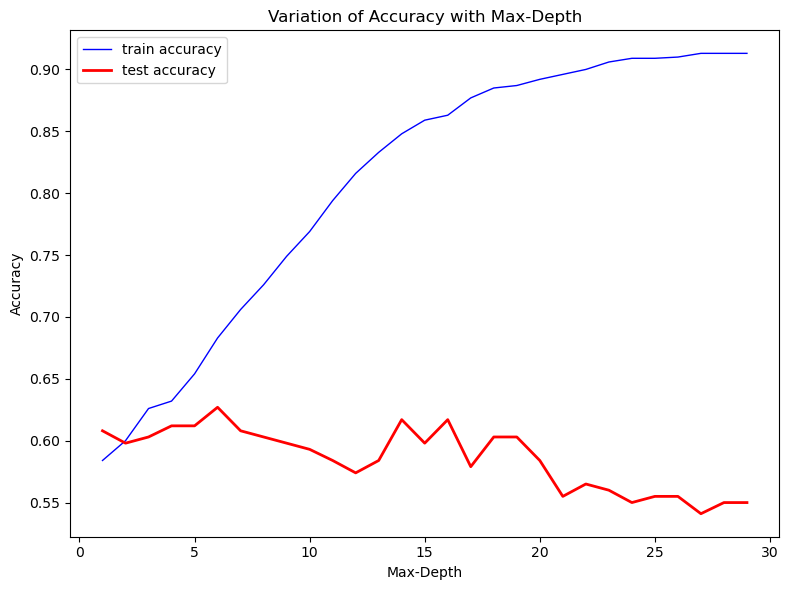

In [52]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth, criterion='gini')
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

Confusion Matrix for Train Set


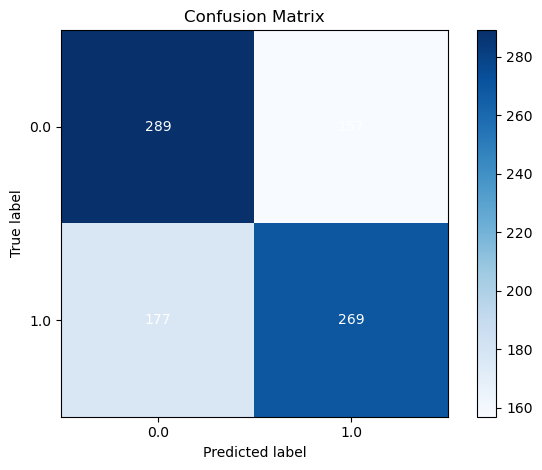

In [53]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
y_pred = best_grid_dt.predict(X_train)
pd. DataFrame (confusion_matrix(y_train, y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q2')

In [54]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))


Confusion Matrix for Test Set


0   1
0  77  50
1  33  49

In [55]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))
print("Accuracy Score {}".format(accuracy_score(y_train,best_grid_dt.predict(X_train))))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.62      0.65      0.63       446
         1.0       0.63      0.60      0.62       446

    accuracy                           0.63       892
   macro avg       0.63      0.63      0.63       892
weighted avg       0.63      0.63      0.63       892

Accuracy Score 0.625560538116592


In [56]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))
print("Accuracy Score {}".format(accuracy_score(y_test,best_grid_dt.predict(X_test))))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       127
         1.0       0.49      0.60      0.54        82

    accuracy                           0.60       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.62      0.60      0.61       209

Accuracy Score 0.6028708133971292


## Hyperparameter Tuning on Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [59]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [60]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt')

In [61]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt')

### Train Set

[[382  64]
 [ 89 357]]
Accuracy Score 0.82847533632287
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       446
         1.0       0.85      0.80      0.82       446

    accuracy                           0.83       892
   macro avg       0.83      0.83      0.83       892
weighted avg       0.83      0.83      0.83       892



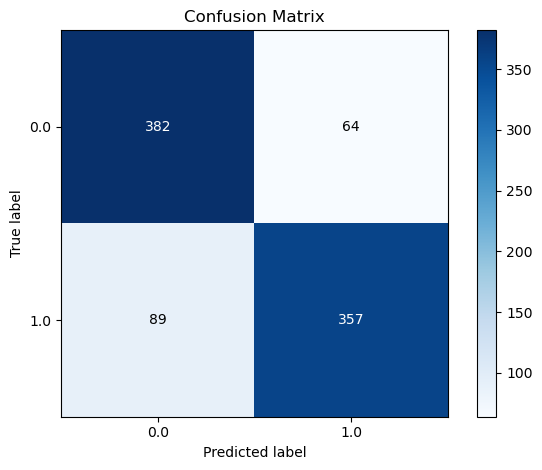

In [62]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

In [63]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[81 46]
 [33 49]]
Accuracy Score 0.6220095693779905
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.64      0.67       127
         1.0       0.52      0.60      0.55        82

    accuracy                           0.62       209
   macro avg       0.61      0.62      0.61       209
weighted avg       0.63      0.62      0.63       209



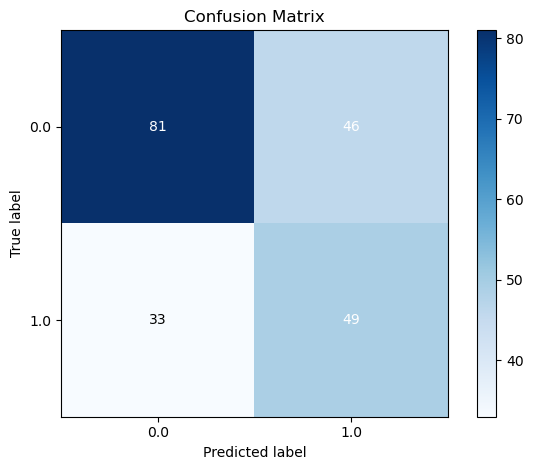

[CV] END criterion=gini, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=6, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=6, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=en

[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criter

[CV] END criterion=gini, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=7, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=7, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=7, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......

[CV] END criterion=gini, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=6, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=6, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=7, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=7, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=7, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=6, splitter=best; total time=   0.0s
[CV] END ......criterion=en

[CV] END criterion=gini, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=range(2, 8), splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END 

In [64]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q2')

## Hyperparameter Tuning on Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [ ]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

In [ ]:
# Finding out the best estimator
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

# Applying the best grid for logistic regression

In [ ]:
best_grid_lr.fit(X_train, y_train)

### Train Set

In [ ]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

In [ ]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [ ]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

In [ ]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

# Applying the best grid for SVM

In [ ]:
best_grid_svc.fit(X_train, y_train)

### Train Set

In [ ]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

In [ ]:
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVM hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [ ]:
from  sklearn.naive_bayes import MultinomialNB

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [ ]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

In [ ]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

In [ ]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

### Train Set

In [ ]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

In [ ]:

y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for test set MultinomialNB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))


## ensemble learning

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard voting classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

### Train Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [ ]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

### Train Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


## out of bag evaluation

In [ ]:
bag_clf = BaggingClassifier(best_grid_dt, n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q2')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

## impact of no. of estimators

In [ ]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

In [ ]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

### Train Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

### Test Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [ ]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

In [ ]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

#conda install -c conda-forge xgboost

In [ ]:
import xgboost as xgb
print (xgb)

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

### Train Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test), cmap='viridis');
save_fig('Test Set Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [ ]:
#conda install -c conda-forge ds-lime

In [68]:
from lime.lime_tabular import LimeTabularExplainer

In [69]:
feature_names = X_train.columns
#X_train.columns.values.tolist()

In [70]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [71]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [72]:
# Generate explanations using LIME
#Since our accuracy is the highest for Multinomial Naive Bayes, we will be using Multinomial Naive Bayes to interpret 
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.12346e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [73]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.44462512 0.55537488]]


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [74]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
studytime > 0.33 -0.11754120092718309
schoolsup_yes <= 0.00 0.08145444061601137
0.44 < avg_grade <= 0.56 0.06457482609461725
failures <= 0.00 -0.04868755487304192
paid_yes > 0.00 0.04690579943811347
0.04 < absences <= 0.11 0.03282937230176976
higher_yes <= 1.00 0.0


### Feature Importance Plot

In [75]:
feature_importance = explanation_lime.as_list()

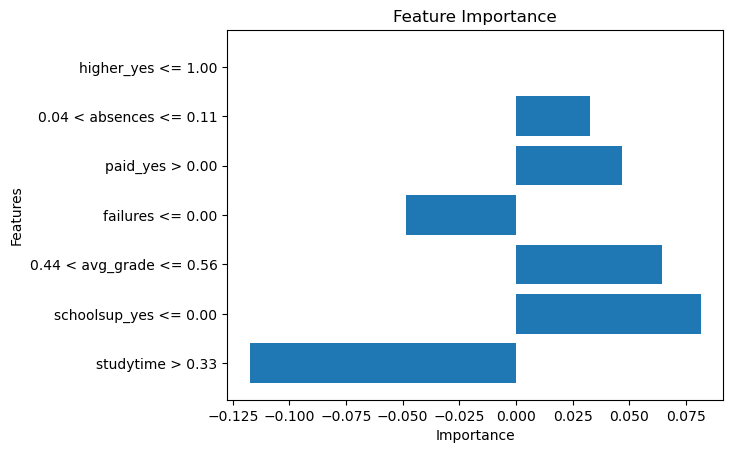

In [76]:
features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 2/LIME Feature Importance q2.png')
plt.show()


### LIME Explanation Plot

In [77]:
feature_contributions = explanation_lime.local_exp[1]

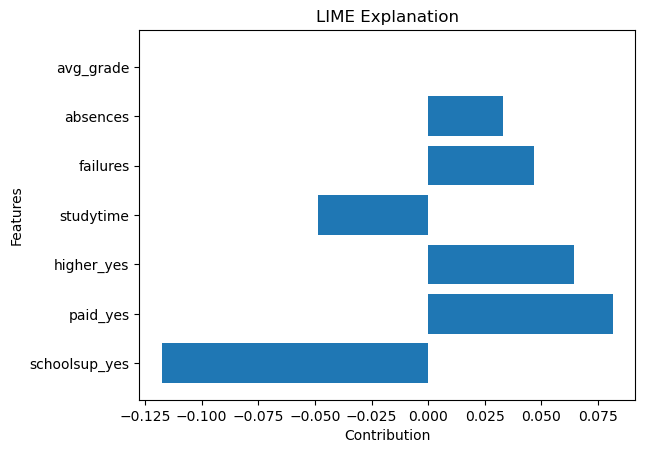

In [78]:
features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 2/LIME Explanation Graph q2.png')
plt.show()

## Explanation for class 1

In [79]:
#Perform the explanation on the 0th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[0], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explaination.show_in_notebook(show_table = True, show_all = False)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 1 q2.html')

Predicted:  1.0
Actual:  1.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.52487e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## Explanation for class 0

In [80]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 0 q2.html')

Predicted:  0.0
Actual:  0.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.14926e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


# SHAP

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

In [ ]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1], show=False)
plt.savefig('images/question 2/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')